<br>**Part A: Regression [1 Mark]**

<br>Load the required libraries.<br>


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix
import seaborn as sns



>*Note: There is an issue that came up with importing from tensorflow - I kept getting a message stating that the import could not be resolved when I used "from tensorflow.keras.datasets". However, when I went ahead and tried to load the mnist dataset in part c I found that, despite this, the command was executed successfully. Same thing for "import tensorflow.keras as keras" - it works, even though I get a message telling me that the import could not be resolved.*

<br>1. Loading the data<br>



In [ ]:
url = "https://raw.githubusercontent.com/martianunlimited/compx310_datasets/main/housing.csv"
data = pd.read_csv(url)


<br>2. Preparing the full data for the regression algorithms:
  - replace any missing values
  - turn categorical values ('ocean_proximity') into numeric ones
<br>

In [ ]:
# Replace any missing values
data.fillna(data.median(numeric_only=True), inplace=True)

# Turn categorical values ('ocean_proximity') into numeric ones
data['ocean_proximity'] = pd.factorize(data['ocean_proximity'])[0]

<br><br><br><br><br><br><br><br><br><br>3. Define X as all the numerical features in the dataframe except
   median_house_value and y to be the target value `median_house_value`.<br>
   
   Split the data into 80% train and 20% test data.
<br>

In [ ]:
# Define X as all the numerical features in the dataframe except median_house_value
X = data.drop('median_house_value', axis=1)

# Define y to be the target value median_house_value
y = data['median_house_value']

# Split the data into 80% train and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



<br>4. Define a function called run_reg that takes a regressor and
  X_train, X_test, y_train, y_test as arguments
  and computes the following:<br>
  
```
  def run_reg( regressor, X_train, X_test, y_train, y_test):
     #train the regressor using the train data
     #compute predictions for the test data
     #set all predictions that are smaller than 15000, to 15000
     #set all predictions that are larger than 500000, to 500000
     #compute the MAE (mean_absolute_error) for the test data
     #scatterplot the true test targets vs. predictions (show MAE in the plot as "title")
     #return the MAE
```
<br>



In [ ]:
def run_reg(regressor, X_train, X_test, y_train, y_test):
    # train the regressor using the train data
    reg = regressor.fit(X_train, y_train)
    # compute predictions for the test data
    y_pred = reg.predict(X_test)
    # set all predictions that are smaller than 15000, to 15000
    y_pred = [15000 if pred < 15000 else pred for pred in y_pred]
    # set all predictions that are larger than 500000, to 500000
    y_pred = [500000 if pred > 500000 else pred for pred in y_pred]
    # compute the MAE (mean_absolute_error) for the test data
    mae = mean_absolute_error(y_test, y_pred)
    # scatterplot the true test targets vs. predictions (show MAE in the plot as "title")
    plt.scatter(y_test, y_pred)
    plt.title(f"MAE: {mae:.2f}")
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.show()
    # return the MAE
    return mae

<br>5. Call run_reg each with the following SGDRegressor with the following  
   learning rates [0.00000001, 0.0001], (use the X_train, X_test, y_train
   and y_test you defined in step 4 for the other arguments) (replace ID with your ID)<br>
   
a)
```
reg = SGDRegressor(learning_rate='constant',eta0=0.00000001,random_state=ID)
```
b)
```
reg = SGDRegressor(learning_rate='constant',eta0=0.0001,random_state=ID)
```
<br><br><br><br><br><br><br><br><br>


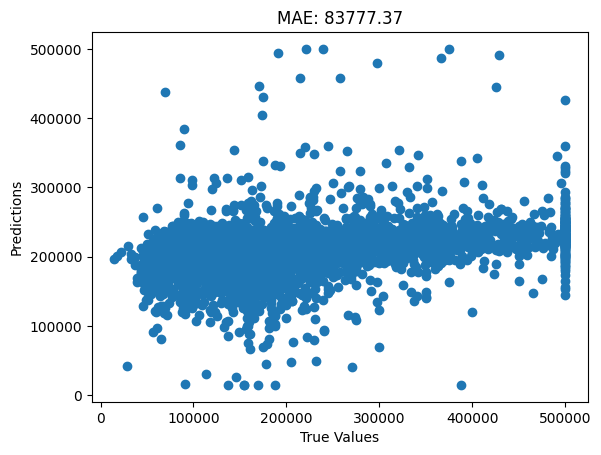

Learning Rate: 1e-08, MAE: 83777.37


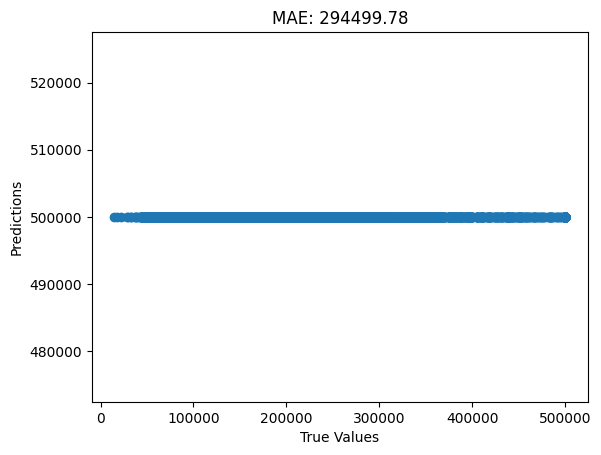

Learning Rate: 0.0001, MAE: 294499.78


In [ ]:
# Use my ID for the random state
ID = 1481257

# Call run_reg for both learning rates (0.00000001 and 0.0001)
learning_rates = [0.00000001, 0.0001]
for rate in learning_rates:
    reg = SGDRegressor(learning_rate='constant', eta0=rate, random_state=ID)
    mae = run_reg(reg, X_train, X_test, y_train, y_test)
    print(f"Learning Rate: {rate}, MAE: {mae:.2f}")

<br>6. Scale the features using standard scaler, below is a sample code on how you can scale your data:<br>

```
     from sklearn.preprocessing import StandardScaler
     scaler=StandardScaler()
     X_train_scaled=scaler.fit_transform(X_train)
     X_test_scaled=scaler.transform(X_test)
```
<br>

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<br>7. Rerun task 5 with X_train_scaled and X_test_scaled instead of X_train and X_test.<br>


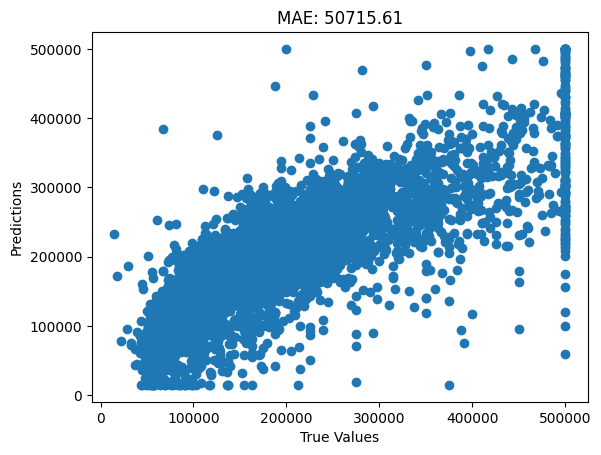

Learning Rate: 1e-08, MAE (Scaled): 50715.61


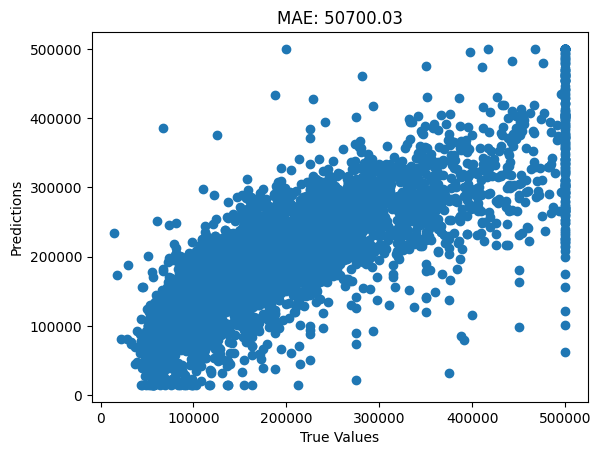

Learning Rate: 0.0001, MAE (Scaled): 50700.03


In [ ]:
for rate in learning_rates:
    reg = SGDRegressor(learning_rate='constant', eta0=rate,max_iter = 1000000, random_state=ID)
    mae = run_reg(reg, X_train_scaled, X_test_scaled, y_train, y_test)
    print(f"Learning Rate: {rate}, MAE (Scaled): {mae:.2f}")


<br>
Comment on the difference in the results in steps 5 vs 7.
<br>

<br>**Answer:**<br>

>**Learning Rate: 0.00000001**<br>

>Unscaled Data: <br>
>>The mean absolute error (MAE) of 83777.37 suggests that the model is not fitting the data very well. The plot is mostly horizontal, where most predictions fall between 100000 and 250000, which indicates that the model is not effectively capturing the complex relationships within the data. The model's predictions are concentrated within a narrow range, and it struggles to make accurate predictions across the full range of true values. This is evident from the spread of dots along the graph and the limited deviation from the concentrated area.<br>

>Scaled Data:<br>

 >>The lower MAE of 50715.61 indicates a better fit compared to the unscaled data. The widespread distribution of dots, forming a diagonal line from bottom left to top right on the graph, suggests that the model is able to capture a wider range of relationships within the scaled data. The diagonal line indicates a more consistent and meaningful prediction pattern across different true values. The smaller MAE and the spread of predictions indicate that the model is making better predictions compared to the unscaled data.<br>

>**Learning Rate: 0.0001**<br>

>Unscaled Data:<br>

 >>The MAE of 294499.78, along with the horizontal line seen in the plot, suggests that the model is not performing well on the unscaled data. The predictions are consistently off, as indicated by the constant line at 500,000 for predictions. This inability to capture variations in the data might be due to the larger learning rate, which can lead to overshooting the optimal values during training.<br>

>Scaled Data:<br>

 >>The identical MAE of 50700.03 for both scaled learning rates suggests that, despite the difference in learning rates, the scaled data produces similar results. The fact that both scaled plots appear almost identical indicates that the model is not significantly influenced by the learning rate when dealing with scaled data. This might indicate that the scaled data helps stabilize the training process and allows the model to converge more consistently.<br>

>**Conclusion:**<br>
>>Scaling the data has a positive impact on model performance, allowing the model to make more accurate predictions. The similarity in the results for both scaled learning rates suggests that the scaled data provides more reliable training outcomes.

---
<br>**Part B: Learning Curves [1 mark]**<br>




<br>In this section we are going to visualize what is happening as the regressor learns in part A and why scaling the data has such pronounced effect on gradient descent.<br><br>

1. We will provide you with the skeleton code to plot the learning curve, which
   is as follows:

In [ ]:
def run_training_curve(X_train,X_test,y_train,y_test,learning_rate=0.000000001,no_epoch=1000):
    sgd=SGDRegressor(random_state=1234567,verbose=0,learning_rate='constant',eta0=learning_rate) # Don't change the random_state
    train_loss_list=[]
    test_loss_list=[]
    for epoch in range(no_epoch):
        sgd.partial_fit(X_train,y_train)
        y_pred_train=sgd.predict(X_train)
        y_pred_test=sgd.predict(X_test)
        train_loss_list.append(np.sqrt(np.mean((y_pred_train-y_train)**2)))
        test_loss_list.append(np.sqrt(np.mean((y_pred_test-y_test)**2)))
    plt.plot(train_loss_list,label=f'training Loss {np.min(train_loss_list[500:]):.6}')
    plt.plot(test_loss_list,label=f'test Loss {np.min(test_loss_list[500:]):.6}')
    plt.legend()
    plt.title(f"Train/Test loss curve for regressor with learning_rate={learning_rate}")
    plt.show()

<br><br><br><br><br><br><br><br><br><br>2. Plot the learning curves with for the following 5 cases:<br>

a)
```
Unscaled data (X_train) with learning_rate=0.00000001
```

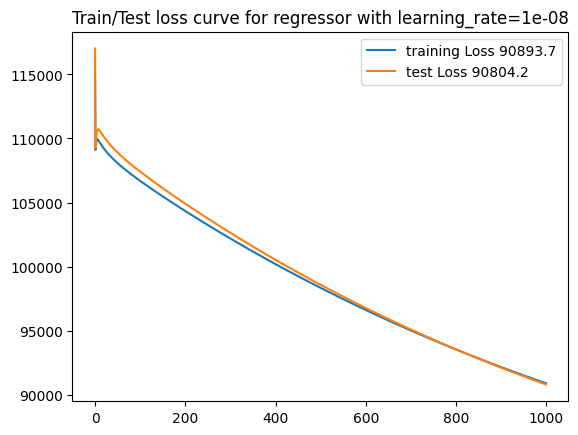

In [ ]:
learning_rate_case_a = 0.00000001

# case a is unscaled data
data_case_a = X_train

# Plot learning curve for case a
run_training_curve(data_case_a, X_test, y_train, y_test, learning_rate_case_a)


b)
```
Unscaled data (X_train) with learning_rate=0.0001
```

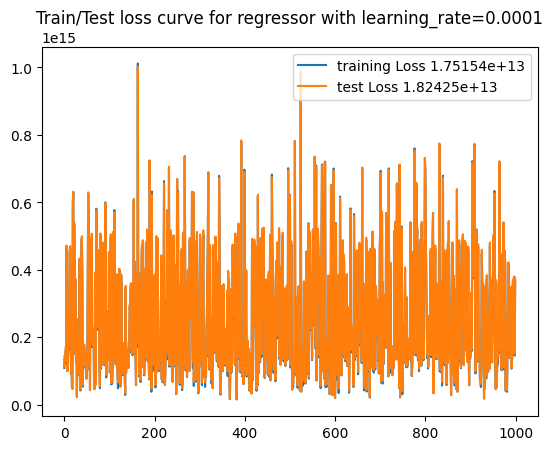

In [ ]:
learning_rate_case_b = 0.0001

# case b is unscaled data
data_case_b = X_train

# Plot learning curve for case b
run_training_curve(data_case_b, X_test, y_train, y_test, learning_rate_case_b)

c)
```
Scaled data (X_train_scaled) with learning_rate=0.00000001
```

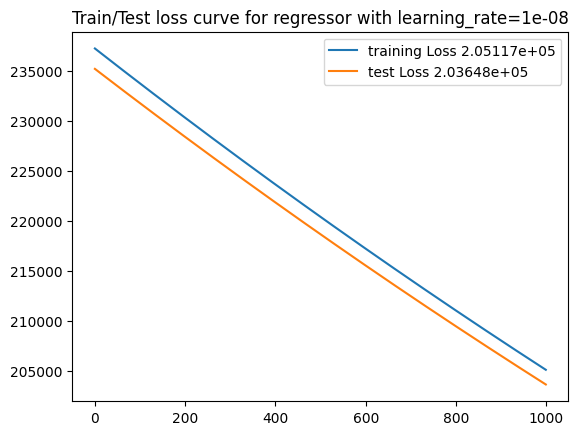

In [ ]:
learning_rate_case_c = 0.00000001

# case c is scaled data
data_case_c = X_train_scaled

# Plot learning curve for case c
run_training_curve(data_case_c, X_test_scaled, y_train, y_test, learning_rate_case_c)

d)
```
Scaled data (X_train_scaled) with learning_rate=0.0001
```

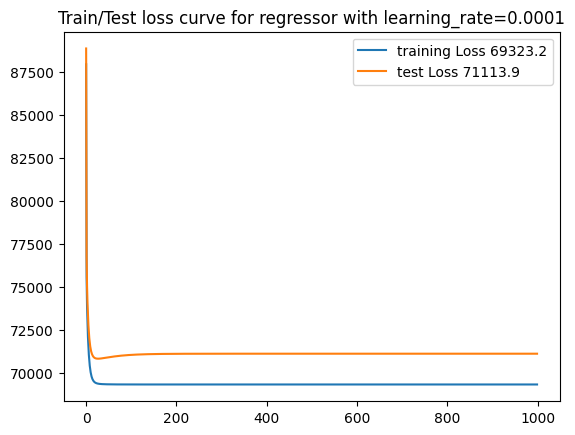

In [ ]:
learning_rate_case_d = 0.0001

# case d is scaled data
data_case_d = X_train_scaled

# Plot learning curve for case d
run_training_curve(data_case_d, X_test_scaled, y_train, y_test, learning_rate_case_d)

<br><br>e)
```
Scaled data (X_train_scaled) with learning_rate=1
```

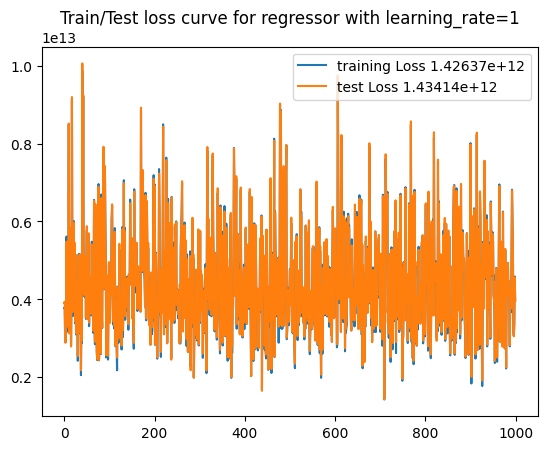

In [ ]:
learning_rate_case_e = 1

# case e is scaled data
data_case_e = X_train_scaled

# Plot learning curve for case e
run_training_curve(data_case_e, X_test_scaled, y_train, y_test, learning_rate_case_e)

Comment about the learning curves obtained in step 2.<br>

Suggested discussion :<br>
- what do you think is going on with b and e? <br>
- why is the training + test loss jumping around and not converging?<br>
- what do you think is going on with a) do you think we will eventually converge to a better solution if we increase the number of training steps (epochs) (say.. no_epoch=5000?)<br>
- what about c) do you think we could increase the training steps / learning rate to get to a better solution?<br>
- what about d) do you think we could have reduced the number of training steps and still obtain a solution that is as good as what we obtained?<br>

<br>**Answer:**<br>

>a) Unscaled data (X_train) with learning_rate=0.00000001<br>
>>The learning curve shows a slow but consistent decrease in both training and test losses. This indicates that the model is learning to fit the data better over time. The slight upward bump that preceded a more gradual decline might be due to fluctuations in the optimization process. Increasing the number of training steps (epochs) to 5000 could potentially allow the model to converge to a better solution and smooth out these fluctuations.<br>

>b) Unscaled data (X_train) with learning_rate=0.0001<br>
>>The learning curve suggests instability in the training process. The rapid oscillations and high magnitudes of losses indicate that the learning rate might be too high for the data. The model is overshooting the optimal values, leading to divergence in behavior rather than convergence. Decreasing the learning rate could potentially stabilize the training process and allow the model to converge.<br>

>c) Scaled data (X_train_scaled) with learning_rate=0.00000001<br>
>>The diagonal lines in the learning curve indicate that the model is learning to fit the data well. The scaled data allows for smoother optimization, and the learning rate is small enough to ensure stability. Increasing the number of training steps might lead to further improvements, but the solution already seems to be converging well.<br>

>d) Scaled data (X_train_scaled) with learning_rate=0.0001<br>
>>The initial steep drop followed by a horizontal trajectory indicates that the learning rate might be too high for the scaled data. The model is likely overshooting and then settling into a suboptimal solution. Reducing the number of training steps might still yield a solution as good as the current one, given that the model already reaches a stable state relatively quickly.<br>

>e) Scaled data (X_train_scaled) with learning_rate=1<br>
>>Similar to b (Unscaled data with learning_rate=0.0001), the learning curve shows extreme instability with rapid oscillations and high losses. The learning rate of 1 is extremely high and leads to the model being unable to converge to a meaningful solution. The model is overshooting and diverging, leading to the erratic behavior in the learning curve.<br>



---
<br>**Part C - Simple neural networks (MLP) [1 mark]**<br>


<br>1. load the MNIST dataset using the following commands:<br>


```
    from tensorflow.keras.datasets import mnist
    (X_trainval,y_trainval),(X_test,y_test) = mnist.load_data()
```

In [ ]:

# Load the MNIST dataset
(X_trainval, y_trainval), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


<br>2. split X_trainval and y_trainval into a 75%/25% training and validation split stratified on y_trainval.<br>
 (hint: you can use sklearn's train_test_split)<br>


In [ ]:
# Split data into training and validation sets with stratification
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=ID)

>*Note:test_size parameter is set to 0.25, which means that 25% of the data will be used for validation and, therefore, 75% will be used for training.*

<br>3. normalize X_train, X_val and X_test using the following command:

```
    X_train=X_train/255
    X_val=X_val/255
    X_test=X_test/255
```
<br>

In [ ]:
# normalize X_train, X_val and X_test
X_train=X_train/255
X_val=X_val/255
X_test=X_test/255

<br>4. import the following libraries:


```
   import tensorflow.keras as keras
```

   - Define your model using model=keras.models.Sequential()
   - set your first layer to a Flatten layer with input_shape=(28,28)
   - set your second, third and fourth layers to be 50 Dense units with activation='relu'
   - set your final layer to be 10 Dense units with activation='softmax'
   <br>

In [ ]:
# Define your model using model=keras.models.Sequential()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # set your first layer to a Flatten layer with input_shape=(28,28)
    keras.layers.Dense(50, activation='relu'), # set your second, third and fourth layers to be 50 Dense units with activation='relu'
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # set your final layer to be 10 Dense units with activation='softmax'
])

<br>5. Set your optimizer as ADAM, and your loss function to sparse_categorical_crossentropy and metrics=['accuracy']<br>


In [ ]:
# Set your optimizer as ADAM, and your loss function to sparse_categorical_crossentropy and metrics=['accuracy']
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<br>6. view your model using model.summary()<br>

In [ ]:
# Display the model using model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 50)                39250     
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________


<br>7. Fit your model using X_train for 30 epoch, remember to set validation_data=(X_val,y_val).<br>

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1407/1407 [==============================] - 7s 4ms/step - loss: 0.3309 - accuracy: 0.9039 - val_loss: 0.1906 - val_accuracy: 0.9423
Epoch 2/30
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1458 - accuracy: 0.9570 - val_loss: 0.1559 - val_accuracy: 0.9563
Epoch 3/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1099 - accuracy: 0.9667 - val_loss: 0.1283 - val_accuracy: 0.9609
Epoch 4/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0891 - accuracy: 0.9729 - val_loss: 0.1149 - val_accuracy: 0.9653
Epoch 5/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0725 - accuracy: 0.9774 - val_loss: 0.1222 - val_accuracy: 0.9647
Epoch 6/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0606 - accuracy: 0.9813 - val_loss: 0.1182 - val_accuracy: 0.9657
Epoch 7/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0558 - accuracy: 0.9816 - val_loss: 0.1194 - val_accuracy:

<br>Discuss your observation on the
training and validation loss and accuracies.<br>

<br>**Answer:**<br>

>**Training and Validation Loss:**<br>

>>The training loss starts at 0.3309 and gradually decreases over the epochs to 0.0117, indicating that the model is effectively learning from the training data.<br>

>>While the validation loss usually decreased over the epochs, it did sometimes increase and occassionally spiked in value. It started at 0.1906 and reached 0.2128 by the end of training, which was a spike from the previous epoch at which it had a value of 0.1766.<br>

>>Both the training and validation loss exhibit an overall decreasing trend, suggesting that the model is learning the underlying patterns of the data.<br>


>**Training and Validation Accuracies:**<br>

>>The training accuracy starts around 90.39% and steadily increases to around 99.61%, indicating that the model is progressively improving its performance on the training set.<br>

>>The validation accuracy begins at 94.23% and rises to 96.47% by the end of training, which suggests that the model's predictions are accurate on previously unseen data.<br>

>>Both the training and validation accuracies exhibit an overall increasing trend, suggesting that the model is learning to generalize well to unseen data.
<br>

>**Conclusion:**<br>

>>This model seems to generalize well to unseen data, which is a positive sign of its ability to avoid overfitting.<br>

>>The training and validation loss/accuracy seem to have stabilized after reaching the range of 25-30 epochs, which indicates that further training might not lead to significant improvement.<br>

>>This model exhibits successful learning and generalization, with both the training and validation showing consistent improvements.<br>


<br>8. do a prediction of X_test, and visualize the confusion matrix.<br>

313/313 [==============================] - 1s 2ms/step


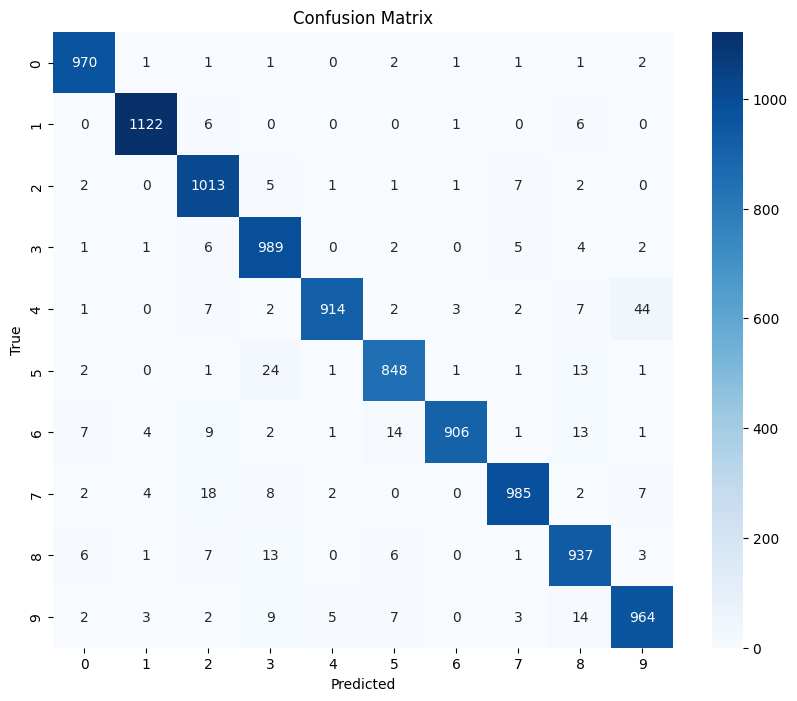

In [ ]:
# Predict on X_test
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<br>Comment on the training and validation loss & accuracies and comment on the confusion matrix.<br>

*tip: you can use the code in chapter 6 to plot the learning curves if you need help with what you can say about the training and validation loss + accuracies.*
<br>


In [ ]:
# print out the training and validation loss & accuracies
print()
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])


Training Loss: 0.011677141301333904
Validation Loss: 0.2127787321805954
Training Accuracy: 0.9961333274841309
Validation Accuracy: 0.9646666646003723


<br>**Answer:**<br>

> This model demonstrates excellent performance in terms of low loss values and high accuracy on both the training and validation data.<br>
>>The training loss is low at 0.0117, which suggests that the model has learned the patterns of the training data very well, and the validation loss, while slightly higher at 0.2128, is still relatively low which indicates that the model's performance is consistent on unseen data.<br>

>>The training accuracy is 99.61%, indicating that the model correctly predicts nearly all digits in the training set, and the validation accuracy of 96.47% shows that the model also does well with unseen data.<br><br>


>The confusion matrix shows that the model performs well across most classes. It exhibits higher values along the diagonal elements, which represent the correctly predicted instances for each class, and much lower values in off-diagonal positions.